## dilation then erosion

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [69]:
img_binary = plt.imread(r'j.png')

In [71]:
K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)) # rectangular kernel with 5 x 5 dimensions
K_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) # ellipse
K_c = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)) # cross

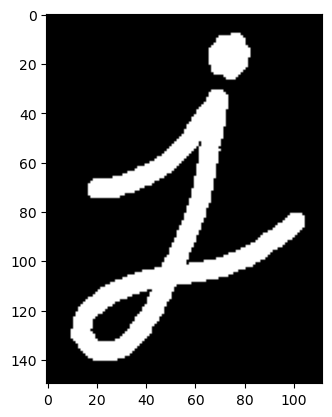

In [73]:
im_bool = np.array(img_binary[:,:,0],dtype = bool) # converting image to bool image
plt.imshow(im_bool,cmap='gray')

### creating holes

In [76]:
H = np.random.rand(im_bool.shape[0],im_bool.shape[1])

In [78]:
H_binary = H<0.98

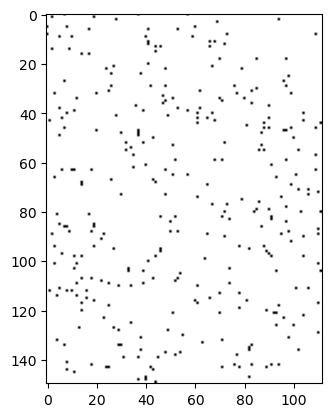

In [80]:
plt.imshow(H_binary,cmap='gray')

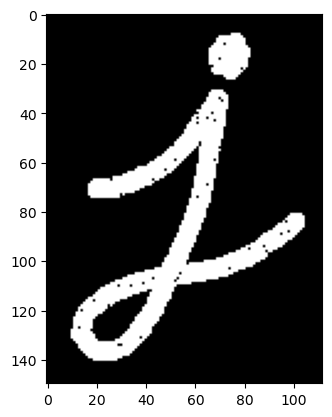

In [82]:
img_H = im_bool & H_binary
plt.imshow(img_H,cmap='gray')

#### closing the image with the built in function

In [85]:
C_r = cv2.morphologyEx(np.float32(img_H),cv2.MORPH_CLOSE,K_r)

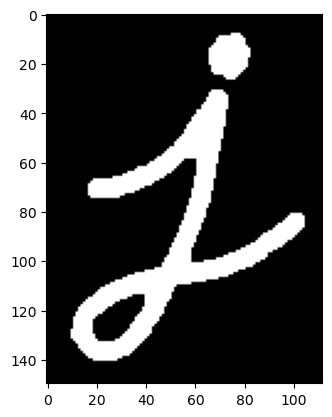

In [87]:
plt.imshow(C_r,cmap='gray')

In [89]:
plt.imsave('j_closed.png',C_r,cmap='gray')

### holes have been filled and image is restored

#### doing dilation and erosion separatley

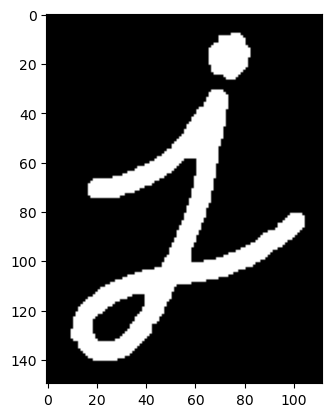

In [60]:
D_r = cv2.dilate(np.float32(img_H),K_r)
C_r2 = cv2.erode(D_r,K_r)
plt.imshow(C_r2,cmap='gray')

Text(0.5, 1.0, 'manually closing')

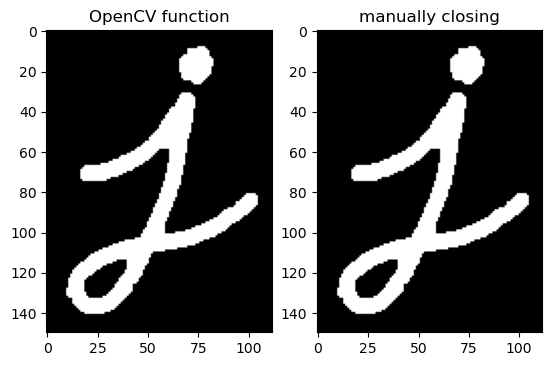

In [61]:
plt.subplot(121)
plt.imshow(C_r,cmap='gray')
plt.title("OpenCV function")
plt.subplot(122)
plt.imshow(C_r2,cmap='gray')
plt.title("manually closing")

# BlackHat

In [118]:
BH_c = cv2.morphologyEx(D_r,cv2.MORPH_BLACKHAT,K_c)

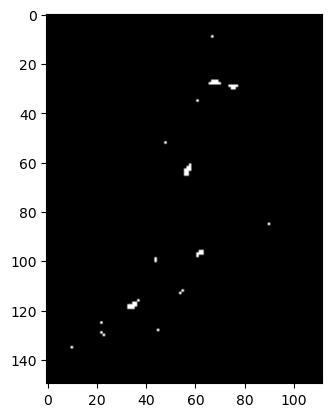

In [120]:
plt.imshow(BH_c,cmap='gray')

# TopHat

In [122]:
TH_c = cv2.morphologyEx(D_r,cv2.MORPH_TOPHAT,K_c)

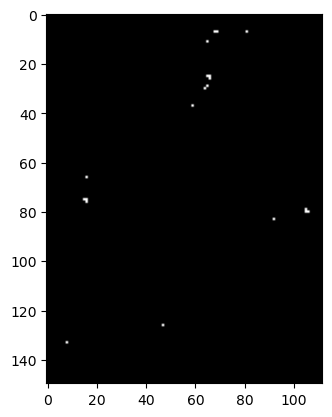

In [125]:
plt.imshow(TH_c,cmap='gray')